In [21]:
%load_ext autoreload
from path import Path2D
from interpolator import LinearInterpolator

import numpy as np
import matplotlib.pyplot as plt


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(30, 2)
LinearInterpolator 1.0
LinearInterpolator 1.0
Path [0, 1.00] interpolated by LinearInterpolator 1.0


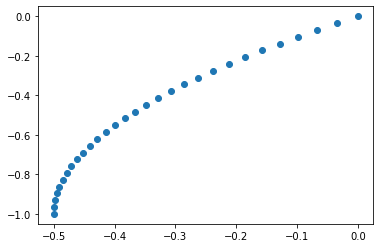

In [159]:
%autoreload 2
N = 30
tmax = 1
time = np.linspace(0, tmax, N)
a = 1
v0 = -1
x = a*time**2 / 2+ v0 *time
y = v0*time
plt.scatter(x, y)
# plt.scatter(-x, y)

# plt.plot(time, time + np.sin(time * 8*np.pi/tmax))

nodes = np.array([x, y]).T
nodes2 = np.array([np.linspace(-1, 1,50), np.ones(50)*0]).T
print(nodes.shape)
path = Path2D(tmax, nodes, LinearInterpolator)
path2 = Path2D(tmax, nodes2, LinearInterpolator)
print(path.__str__())


(150, 2)


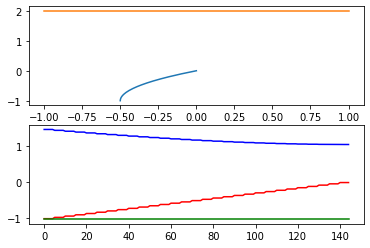

In [160]:
data = np.array([path.pos(t) for t in np.linspace(0, 1, 150)])
data2 = np.array([path2.pos(t) for t in np.linspace(0, 1, 150)])
vel_data = np.array([path.vel(t) for t in np.linspace(0, 1, 150)])
print(data.shape)
plt.figure()
plt.subplot(2,1,1)
plt.plot(data[:,0], data[:,1])
plt.plot(data2[:,0], data2[:,1])
plt.subplot(2,1,2)
plt.plot(vel_data[:-5,0], 'r')
plt.plot(vel_data[:-5,1], 'g')
plt.plot(np.sqrt(vel_data[:-5,0]**2 + vel_data[:-5,1]**2), 'b')

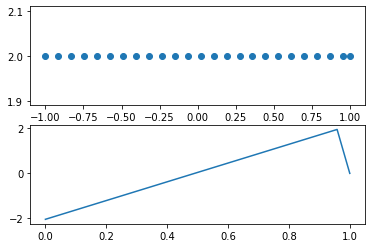

In [161]:
from radar import RadarGenerator

# probes = [[0.2, 0, 0], [0.6, 0.2, 0], [0.8, 0.2, 0], [0.9, 0.2, 0]]
probetimes = np.linspace(0, 1, 25)
probes = [[pt, 0, 0] for pt in probetimes]

radarGen = RadarGenerator([ path2])
measurements = radarGen.make_measurement_series(probes)

msdata = np.array([[ms.x, ms.y] for ms in measurements])
plt.figure()
plt.subplot(2,1,1)
plt.scatter(msdata[:,0], msdata[:,1])
plt.subplot(2,1,2)
plt.plot(probetimes,[ms.vr for ms in measurements])